In [1]:
from climada.util.multi_impacts import *
import os
from climada.engine import Impact

In [2]:
countries = ['AUS']
#Define which files are which, would be good to have standardize names
impact_csvs = {}
impact_mats = {}
impact_csvs_crops = {}
impact_mats_crops = {}
data_dir = '/Users/szelie/OneDrive - ETH Zurich/20211208_Multi-Impact_ZelieCarmen'
for country in countries:
    impact_csvs[country] = {}
    impact_mats[country] = {}
    impact_csvs_crops[country] = {}
    impact_mats_crops[country] = {}
    impact_csvs[country]['RF'] = os.path.join(data_dir, "".join(['RF_impact_mat/river_flood_impact_150arcsec_historical_1980_2000_',country,'.csv']))
    impact_mats[country]['RF'] = os.path.join(data_dir, "".join(['RF_impact_mat/river_flood_impact_150arcsec_historical_1980_2000_',country,'.npz']))


    impact_csvs[country]['TC']  = os.path.join(data_dir, "".join(['TC_impact_mat/imp_',country,'.csv']))
    impact_mats[country]['TC']= os.path.join(data_dir, "".join(['TC_impact_mat/imp_mat_',country,'.npz']))
   
    impact_csvs[country]['WF'] = os.path.join(data_dir, "".join(['WF_impact/historic/imp_wf_',country,'_2001_2020.csv']))
    impact_mats[country]['WF'] = os.path.join(data_dir, "".join(['WF_impact/historic/imp_mat_wf_',country,'_2001_2020.npz']))
    
    #crops
    for crop in ['mai','ric','soy','whe']:
        impact_csvs_crops[country][crop] = os.path.join(data_dir, "".join(['CP_impact/ISIMIP2a/Impact_save_mat/imp_',country,'_',crop,'_nobc_tonnes.csv']))
        impact_mats_crops[country][crop] = os.path.join(data_dir, "".join(['CP_impact/ISIMIP2a/Impact_save_mat/imp_mat_',country,'_',crop,'_nobc_tonnes.npz']))

    #landslide

def open_impacts(country, csv, impact_mat):
    try:
        impact = Impact.from_csv(csv)
        impact.imp_mat = impact.read_sparse_csr(impact_mat)
        return impact
    except:
        print("".join([" No data for ", str(country)]))
        return(None)

In [25]:
country

'AUS'

In [3]:
years = np.array(range(1,400))

country = 'AUS'

impacts = {country:{hazard: open_impacts(country, impact_csvs[country][hazard], 
                                                  impact_mats[country][hazard]) for hazard in impact_csvs[country]} for country in impact_csvs}
impacts_yearsets = {country:{hazard: make_yearset(impacts[country][hazard], years, n_samples=10) for hazard in impacts[country] if impacts[country][hazard]!=None} for country in impacts}

impacts_crops = {}
impact_crops_combined = {}
for country in impact_csvs_crops:
    impacts_crops[country] = {}
    for crop in impact_csvs_crops[country]:
        impact = Impact.from_csv(impact_csvs_crops[country][crop])
        impact.imp_mat = impact.read_sparse_csr(impact_mats_crops[country][crop])
        impacts_crops[country][crop] = impact
        impacts_list = list(impacts_crops[country].values())
        impact_crops_combined[country] = combine_yearly_impacts(impacts_list)
        impact_crops_combined[country] = impact_crops_combined[country].set_imp_mat(sp.sparse.csr_matrix(impact_crops_combined[country].imp_mat))


impacts_yearsets_crops = {}
for country in impact_crops_combined:
    impacts_yearsets_crops[country] = {}
    impacts_yearsets_crops[country]['CP'] = [make_yearset(impact_crops_combined[country], years, country)[0]]

/Users/szelie/python_projects/climada_python/climada/engine/impact.py:812: DtypeWarning: Columns (0,1,2,3,7,14) have mixed types. Specify dtype option on import or set low_memory=False.
  imp_df = pd.read_csv(file_name)
/Users/szelie/python_projects/climada_python/climada/engine/impact.py:812: DtypeWarning: Columns (0,1,2,3,7,14) have mixed types. Specify dtype option on import or set low_memory=False.
  imp_df = pd.read_csv(file_name)


 No data for AUS


/Users/szelie/miniconda3/envs/climada_env/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size


In [10]:
impacts_yearsets_crops['AUS']['CP'][0].event_name

['1980_clm-crop_wfdei',
 '1981_clm-crop_wfdei',
 '1982_clm-crop_wfdei',
 '1983_clm-crop_wfdei',
 '1984_clm-crop_wfdei',
 '1985_clm-crop_wfdei',
 '1986_clm-crop_wfdei',
 '1987_clm-crop_wfdei',
 '1988_clm-crop_wfdei',
 '1989_clm-crop_wfdei',
 '1990_clm-crop_wfdei',
 '1991_clm-crop_wfdei',
 '1992_clm-crop_wfdei',
 '1993_clm-crop_wfdei',
 '1994_clm-crop_wfdei',
 '1995_clm-crop_wfdei',
 '1996_clm-crop_wfdei',
 '1997_clm-crop_wfdei',
 '1998_clm-crop_wfdei',
 '1999_clm-crop_wfdei',
 '2000_clm-crop_wfdei',
 '2001_clm-crop_wfdei',
 '2002_clm-crop_wfdei',
 '2003_clm-crop_wfdei',
 '2004_clm-crop_wfdei',
 '2005_clm-crop_wfdei',
 '2006_clm-crop_wfdei',
 '2007_clm-crop_wfdei',
 '2008_clm-crop_wfdei',
 '2009_clm-crop_wfdei',
 '2010_clm-crop_wfdei',
 '2011_clm-crop_wfdei',
 '2012_clm-crop_wfdei',
 '1971_pepic_gswp3',
 '1972_pepic_gswp3',
 '1973_pepic_gswp3',
 '1974_pepic_gswp3',
 '1975_pepic_gswp3',
 '1976_pepic_gswp3',
 '1977_pepic_gswp3',
 '1978_pepic_gswp3',
 '1979_pepic_gswp3',
 '1980_pepic_gswp3'

In [12]:
impacts_yearsets['AUS']['RF'][0].event_name

['1980_clm40_gswp3',
 '1981_clm40_gswp3',
 '1982_clm40_gswp3',
 '1983_clm40_gswp3',
 '1984_clm40_gswp3',
 '1985_clm40_gswp3',
 '1986_clm40_gswp3',
 '1987_clm40_gswp3',
 '1988_clm40_gswp3',
 '1989_clm40_gswp3',
 '1990_clm40_gswp3',
 '1991_clm40_gswp3',
 '1992_clm40_gswp3',
 '1993_clm40_gswp3',
 '1994_clm40_gswp3',
 '1995_clm40_gswp3',
 '1996_clm40_gswp3',
 '1997_clm40_gswp3',
 '1998_clm40_gswp3',
 '1999_clm40_gswp3',
 '1980_clm40_princeton',
 '1981_clm40_princeton',
 '1982_clm40_princeton',
 '1983_clm40_princeton',
 '1984_clm40_princeton',
 '1985_clm40_princeton',
 '1986_clm40_princeton',
 '1987_clm40_princeton',
 '1988_clm40_princeton',
 '1989_clm40_princeton',
 '1990_clm40_princeton',
 '1991_clm40_princeton',
 '1992_clm40_princeton',
 '1993_clm40_princeton',
 '1994_clm40_princeton',
 '1995_clm40_princeton',
 '1996_clm40_princeton',
 '1997_clm40_princeton',
 '1998_clm40_princeton',
 '1999_clm40_princeton',
 '1980_clm40_watch',
 '1981_clm40_watch',
 '1982_clm40_watch',
 '1983_clm40_watc

/Users/szelie/miniconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:1256: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  return self._crs.to_proj4(version=version)


<GeoAxesSubplot:title={'center':'Expected annual impact'}>

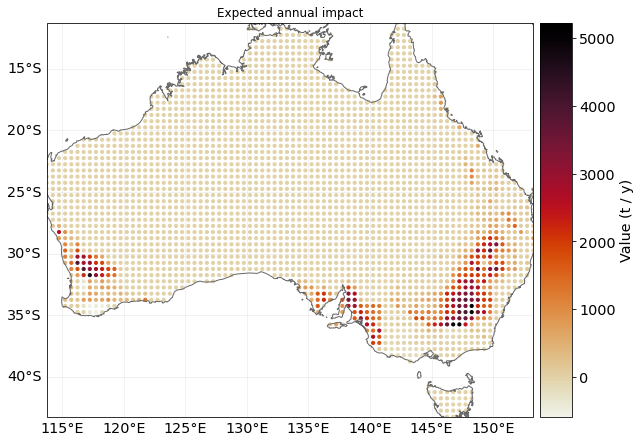

In [40]:
impacts_yearsets_crops['AUS']['CP'][0].plot_scatter_eai_exposure(s=10, pop_name=False, ignore_zero=False)

In [ ]:
vmin = -0.2 
vmax = 0.8
norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)

In [48]:
colors

{'RF': 'lightblue', 'WF': 'red', 'TC': 'plum'}

/Users/szelie/miniconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:1256: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  return self._crs.to_proj4(version=version)


<GeoAxesSubplot:title={'center':'Expected annual impact'}>

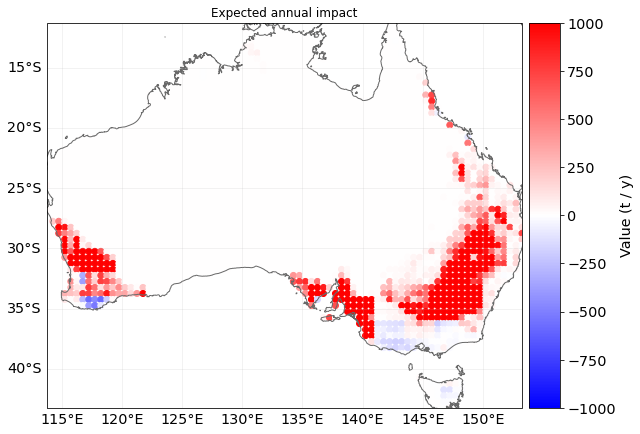

In [53]:
from matplotlib import colors
vmin = np.min(impacts_yearsets_crops['AUS']['CP'][0].imp_mat)
vmax = np.max(impacts_yearsets_crops['AUS']['CP'][0].imp_mat)


impacts_yearsets_crops['AUS']['CP'][0].plot_scatter_eai_exposure(pop_name=False, ignore_zero=False, cmap='bwr', norm = colors.TwoSlopeNorm(vmin=-1000, vcenter=0, vmax=1000))

In [18]:
np.sum(impacts_yearsets['AUS']['RF'][0].eai_exp)

2353893.918306283

/Users/szelie/miniconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:1256: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  return self._crs.to_proj4(version=version)


<GeoAxesSubplot:title={'center':'Expected annual impact'}>

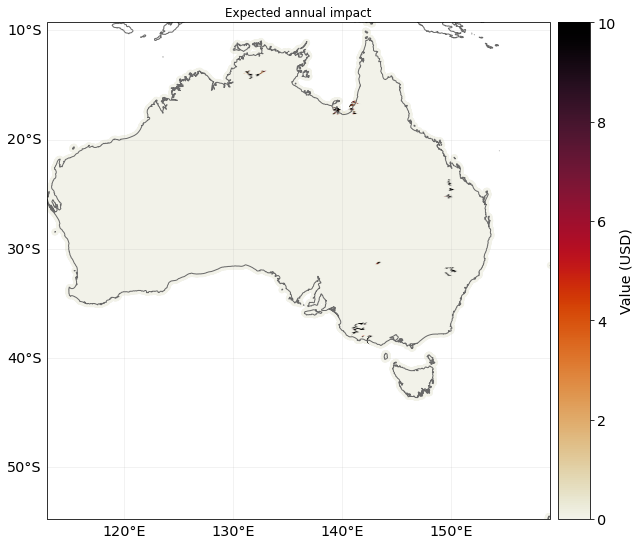

In [55]:
import matplotlib
cmap = "Reds"
impacts_yearsets['AUS']['RF'][0].plot_scatter_eai_exposure(pop_name=False,vmax=10, ignore_zero=False)

/Users/szelie/miniconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:1256: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  return self._crs.to_proj4(version=version)


<GeoAxesSubplot:title={'center':'Expected annual impact'}>

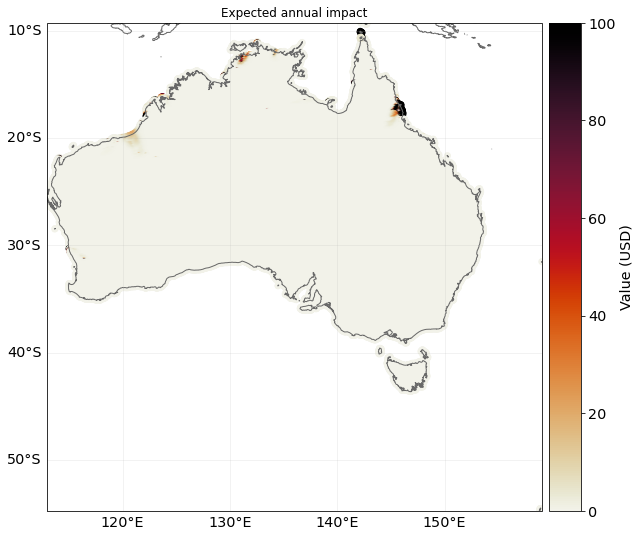

In [54]:
cmap_reversed = matplotlib.cm.get_cmap('magma_r')
#impacts_yearsets['AUS']['TC'][0].imp_mat[impacts_yearsets['AUS']['TC'][0].imp_mat<10] = 0

impacts_yearsets['AUS']['TC'][0].plot_scatter_eai_exposure(pop_name=False,vmax=100, ignore_zero=False)

In [205]:
impacts_list = {country: [n[0] for n in impacts_yearsets[country].values()] for country in impacts_yearsets}
total_impacts = {country: combine_yearly_impacts(impacts_list[country]) for country in impacts_list} 


<AxesSubplot:title={'center':'Exceedance frequency curve'}, xlabel='Return period (year)', ylabel='Impact (t / y)'>

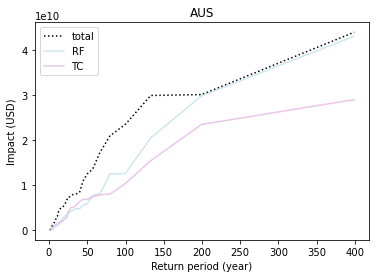

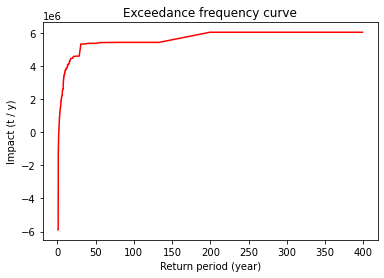

In [206]:
colors={'RF':'lightblue', 'WF':'red', 'TC':'plum'}
for country in total_impacts:
    ax = total_impacts[country].calc_freq_curve().plot(linestyle=':',label='total', color='black')

    for hazard in impacts_yearsets[country]:
        impacts_yearsets[country][hazard][0].calc_freq_curve().plot(axis=ax, label=hazard,  alpha=0.6, color=colors[hazard])



    ax.legend()
    ax.set_title(country)
    
impacts_yearsets_crops['AUS']['CP'][0].calc_freq_curve().plot(color='Red')

In [6]:
years = np.array(range(1,5))
n_samples = 100

country = 'AUS'

impacts = {country:{hazard: open_impacts(country, impact_csvs[country][hazard], 
                                                  impact_mats[country][hazard]) for hazard in impact_csvs[country]} for country in impact_csvs}
impacts_yearsets_4_100 = {country:{hazard: make_yearset(impacts[country][hazard], years, n_samples=n_samples) for hazard in impacts[country] if impacts[country][hazard]!=None} for country in impacts}


impacts_yearsets_4_100_crops = {}
for country in impact_crops_combined:
    impacts_yearsets_4_100_crops[country] = {}
    impacts_yearsets_4_100_crops[country]['CP'] = make_yearset(impact_crops_combined[country], years, country, n_samples=n_samples)

/Users/szelie/python_projects/climada_python/climada/engine/impact.py:812: DtypeWarning: Columns (0,1,2,3,7,14) have mixed types. Specify dtype option on import or set low_memory=False.
  imp_df = pd.read_csv(file_name)
/Users/szelie/python_projects/climada_python/climada/engine/impact.py:812: DtypeWarning: Columns (0,1,2,3,7,14) have mixed types. Specify dtype option on import or set low_memory=False.
  imp_df = pd.read_csv(file_name)


 No data for AUS


/Users/szelie/miniconda3/envs/climada_env/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size


In [126]:
quantiles = {country:{hazard:{quantile:np.quantile(impacts_yearsets[country][hazard][0].at_event, quantile) for quantile in [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95]} for hazard in impacts_yearsets[country]} for country in impacts_yearsets}    

In [127]:
quantiles

{'AUS': {'RF': {0.05: 0.0,
   0.1: 84.8435459283829,
   0.25: 8886.952238272992,
   0.5: 898720.5619863806,
   0.75: 82157390.50264604,
   0.9: 1079827537.2107172,
   0.95: 4334349176.56594},
  'TC': {0.05: 5207.410618780372,
   0.1: 115387.17570059143,
   0.25: 4064337.134748649,
   0.5: 95068220.85249436,
   0.75: 465640306.7790997,
   0.9: 1187158188.977117,
   0.95: 2317967555.167697}}}

In [108]:
i = np.random.randint(0,100)

In [8]:
impacts_quantile_values = copy.deepcopy(impacts_yearsets_4_100)
quantiles = {country:{hazard:{quantile:np.quantile(impacts_yearsets[country][hazard][0].at_event, quantile) for quantile in [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95]} for hazard in impacts_yearsets[country]} for country in impacts_yearsets}    
for country in quantiles:
    for hazard in quantiles[country]:
        for i in range(len(impacts_yearsets_4_100[country][hazard])):
            impacts_quantile_values[country][hazard][i] = np.zeros(len(impacts_yearsets_4_100[country][hazard][i].at_event))
            for quantile in quantiles[country][hazard]:
                for n in range(len(impacts_yearsets_4_100[country][hazard][i].at_event)):
                    if impacts_yearsets_4_100[country][hazard][i].at_event[n]>quantiles[country][hazard][quantile]:
                        impacts_quantile_values[country][hazard][i][n] = quantile


impacts_quantile_values_crops = copy.deepcopy(impacts_yearsets_4_100_crops)
quantiles[country]['CP'] = {quantile:np.quantile(impacts_yearsets_crops[country]['CP'][0].at_event, quantile) for quantile in [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95]}
for country in quantiles:
    for i in range(len(impacts_yearsets_4_100_crops[country]['CP'])):
        impacts_quantile_values_crops[country]['CP'][i] = np.zeros(len(impacts_yearsets_4_100_crops[country]['CP'][i].at_event))
        for quantile in quantiles[country]['CP']:
            for n in range(len(impacts_yearsets_4_100_crops[country]['CP'][i].at_event)):
                if impacts_yearsets_4_100_crops[country]['CP'][i].at_event[n]>quantiles[country]['CP'][quantile]:
                    impacts_quantile_values_crops[country]['CP'][i][n] = quantile

impacts_yearsets_crops


{'AUS': {'CP': [<climada.engine.impact.Impact at 0x7f9fea522610>]}}

In [9]:
impacts_quantile_values

{'AUS': {'RF': [array([0.95, 0.1 , 0.5 , 0.  ]),
   array([0. , 0. , 0.1, 0.5]),
   array([0.95, 0.1 , 0.9 , 0.5 ]),
   array([0.5 , 0.75, 0.5 , 0.  ]),
   array([0.25, 0.75, 0.5 , 0.25]),
   array([0.25, 0.75, 0.5 , 0.9 ]),
   array([0.25, 0.  , 0.25, 0.25]),
   array([0.9 , 0.75, 0.5 , 0.25]),
   array([0.1 , 0.25, 0.1 , 0.05]),
   array([0.5 , 0.05, 0.95, 0.9 ]),
   array([0.95, 0.9 , 0.25, 0.  ]),
   array([0.5, 0.5, 0.9, 0. ]),
   array([0.25, 0.95, 0.25, 0.5 ]),
   array([0.5 , 0.25, 0.25, 0.5 ]),
   array([0.25, 0.05, 0.1 , 0.25]),
   array([0.75, 0.25, 0.25, 0.5 ]),
   array([0.1 , 0.1 , 0.25, 0.25]),
   array([0.25, 0.1 , 0.95, 0.1 ]),
   array([0.25, 0.1 , 0.95, 0.25]),
   array([0.25, 0.5 , 0.5 , 0.25]),
   array([0.  , 0.9 , 0.5 , 0.75]),
   array([0.1 , 0.05, 0.5 , 0.95]),
   array([0.5, 0.5, 0.9, 0.5]),
   array([0.5 , 0.05, 0.75, 0.25]),
   array([0.5, 0.1, 0. , 0.5]),
   array([0.1 , 0.05, 0.95, 0.1 ]),
   array([0.25, 0.5 , 0.1 , 0.5 ]),
   array([0.1 , 0.1 , 0.75, 0.1

In [193]:
i = np.random.randint(1,100)

In [196]:
impacts_quantile_values[country]['RF'][i]

array([0.5 , 0.5 , 0.05, 0.75])

In [197]:
impacts_quantile_values[country]['TC'][i]

array([0.5 , 0.5 , 0.05, 0.75])

In [213]:
impacts_quantile_values_crops[country]['CP'][i]

array([0.5 , 0.25, 0.  , 0.05])

In [225]:
i

29

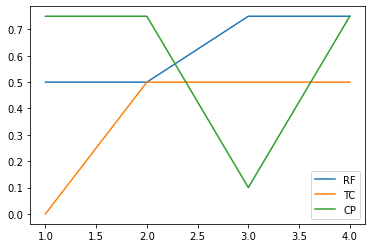

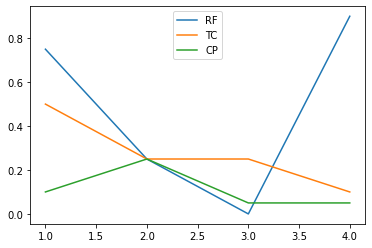

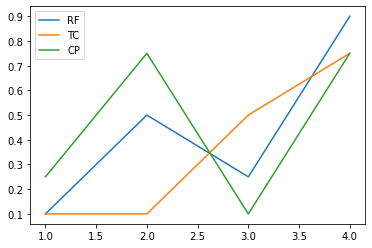

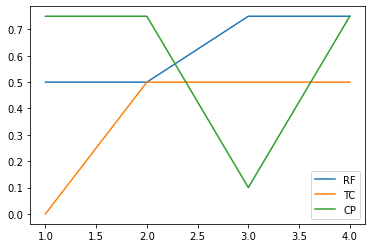

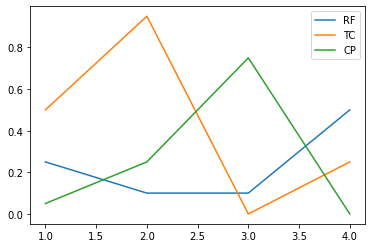

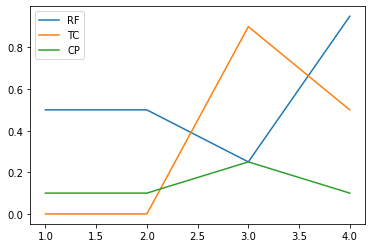

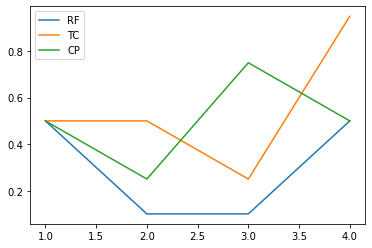

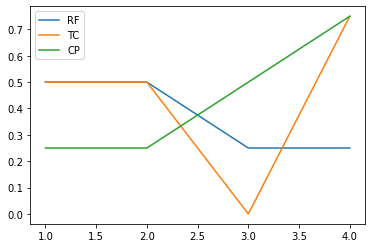

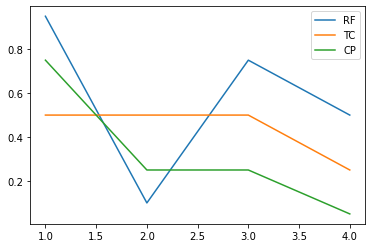

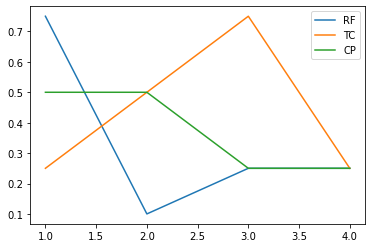

In [239]:
import matplotlib.pyplot as plt
years = [1,2,3,4]
for year in range(10):
    i = np.random.randint(1,100)
    fig, ax = plt.subplots()
    ax.plot(years, impacts_quantile_values[country]['RF'][i], label='RF')
    ax.plot(years, impacts_quantile_values[country]['TC'][i], label='TC')
    ax.plot(years, impacts_quantile_values_crops[country]['CP'][i], label='CP')
    ax.legend()
    

for hazard in impacts_quantile_values[country]:
    quantiles[country][hazard][0.5] - impacts_quantile_values[n] for n in len()




